In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## RandomForest

In [7]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

C:\Users\harshvardhan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF train roc-auc: 0.999862242367717
RF test roc-auc: 0.9752555555555555


In [8]:
ytrain_pred


array([[1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8]])

## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863589331232614
Logistic test roc-auc: 0.9885777777777777


C:\Users\harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Adaboost Classifier

In [10]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


## Knn Classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


## No we will focus on selecting the best threshold for maximum accuracy

In [12]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9842777777777778


In [13]:
pd.concat(pred,axis=1)


,0,1,2,3
0,0.9,0.991869,0.559186,1.0
1,0.0,0.000008,0.463282,0.0
2,1.0,0.966761,0.538202,0.8
3,0.8,0.761461,0.509875,0.8
4,0.6,0.777991,0.490344,0.4
5,0.1,0.542391,0.492548,0.6
6,1.0,0.977743,0.537171,1.0
7,1.0,0.960890,0.552570,0.8
8,1.0,0.993595,0.537610,1.0
9,0.9,0.504627,0.510507,0.6


In [14]:
final_prediction


0      0.862764
1      0.115823
2      0.826241
3      0.717834
4      0.567084
5      0.433735
6      0.878729
7      0.828365
8      0.882801
9      0.628783
10     0.743781
11     0.658892
12     0.190969
13     0.856190
14     0.867532
15     0.118013
16     0.165066
17     0.117459
18     0.113089
19     0.143169
20     0.894313
21     0.493702
22     0.797287
23     0.785303
24     0.117427
25     0.831242
26     0.119011
27     0.707959
28     0.789795
29     0.390164
         ...   
570    0.887340
571    0.121033
572    0.765509
573    0.296021
574    0.110464
575    0.781376
576    0.184066
577    0.115598
578    0.415040
579    0.139125
580    0.572625
581    0.168555
582    0.171253
583    0.115189
584    0.362759
585    0.814165
586    0.164580
587    0.908504
588    0.139644
589    0.279715
590    0.533641
591    0.166727
592    0.136017
593    0.216040
594    0.116964
595    0.121304
596    0.110345
597    0.854195
598    0.160715
599    0.837361
Length: 600, dtype: floa

In [15]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91424695, 0.91424695, 0.9117242 , 0.91077267, 0.83103006,
       0.830555  , 0.82037874, 0.81907151, 0.74634583, 0.7437815 ,
       0.73875837, 0.73782624, 0.71993215, 0.71820261, 0.69285449,
       0.68380786, 0.62878347, 0.62718131, 0.57875922, 0.57262509,
       0.56796766, 0.56722851, 0.5670837 , 0.55365575, 0.54793569,
       0.5336407 , 0.51560863, 0.47185161, 0.4690538 , 0.46805366,
       0.44646096, 0.43458793, 0.43373479, 0.38712534, 0.38342204,
       0.34162899, 0.33553337, 0.27216268, 0.27112022, 0.21868475,
       0.21815777, 0.19145056, 0.19096876, 0.11794908, 0.11783509,
       0.10498954])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()


,thresholds,accuracy
31,0.434588,0.960000
32,0.433735,0.958333
30,0.446461,0.958333
29,0.468054,0.958333
27,0.471852,0.958333


In [17]:
accuracy_ls


,thresholds,accuracy
31,0.434588,0.960000
32,0.433735,0.958333
30,0.446461,0.958333
29,0.468054,0.958333
27,0.471852,0.958333
26,0.515609,0.958333
28,0.469054,0.956667
25,0.533641,0.956667
24,0.547936,0.955000
21,0.567229,0.951667


In [18]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

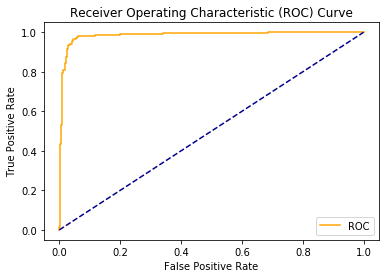

In [19]:
plot_roc_curve(fpr,tpr)
